In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv')

In [ ]:
df.shape

(119390, 32)

### We have nulls and need to treat them before modeling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Featuring scaling is required

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.isnull().mean() * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [ ]:
df=df.drop(['agent','company'],axis=1)

In [ ]:
df["country"].fillna(df["country"].mode()[0],inplace=True)

**Cancelation based on Hotel type**

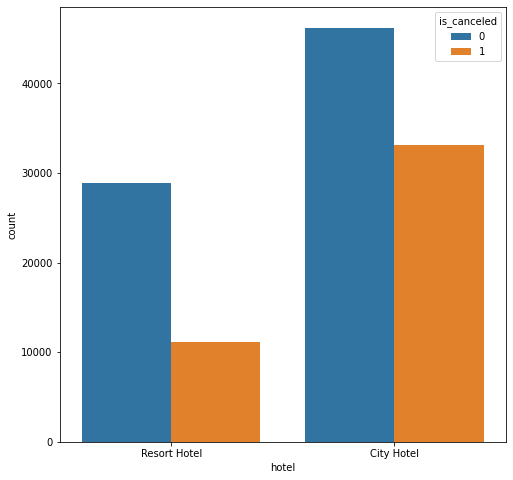

In [ ]:
# df['is_canceled'].value_counts()
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='hotel',hue='is_canceled')

**Is there any specific type of customer responsible for cancellation**

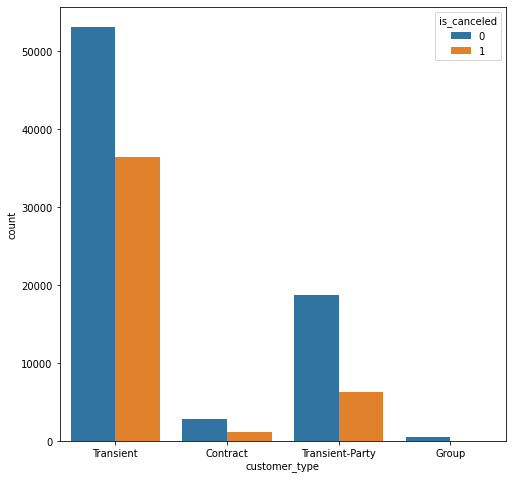

In [ ]:
# df['customer_type'].value_counts()
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='customer_type',hue='is_canceled')

**hmmm.... Folks who book online ,cancels the most**

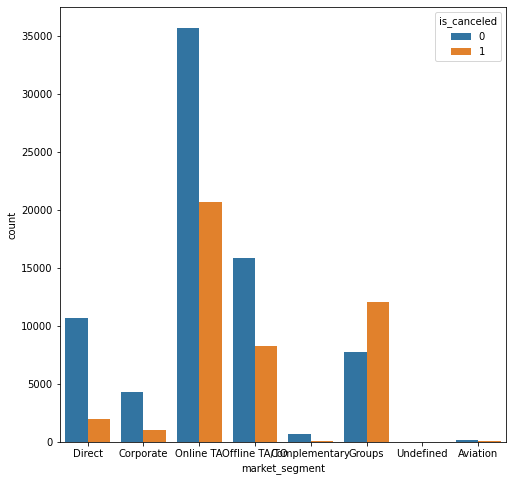

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='market_segment',hue='is_canceled')

### Is refund type is something that we should be worried ..?

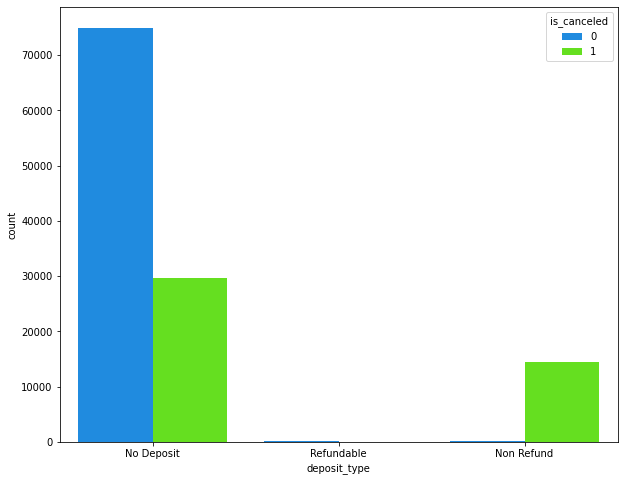

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled', palette= 'gist_rainbow_r')

### How is the monthly traffic looks like

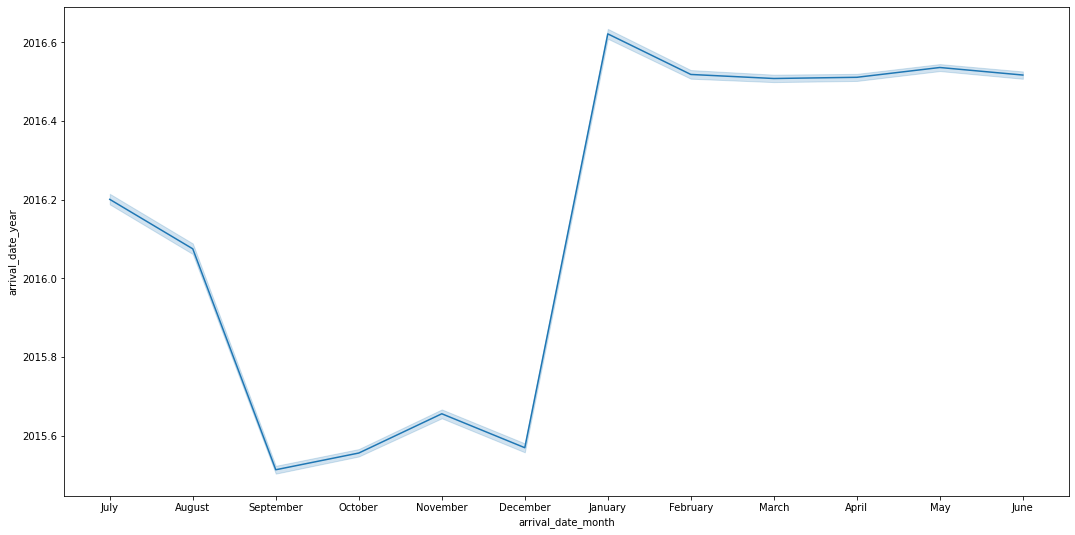

In [ ]:
plt.figure(figsize=(18,9))
sns.lineplot(data=df,x='arrival_date_month',y='arrival_date_year')

### Is there any specific month we should be worried.....?

#### Not really

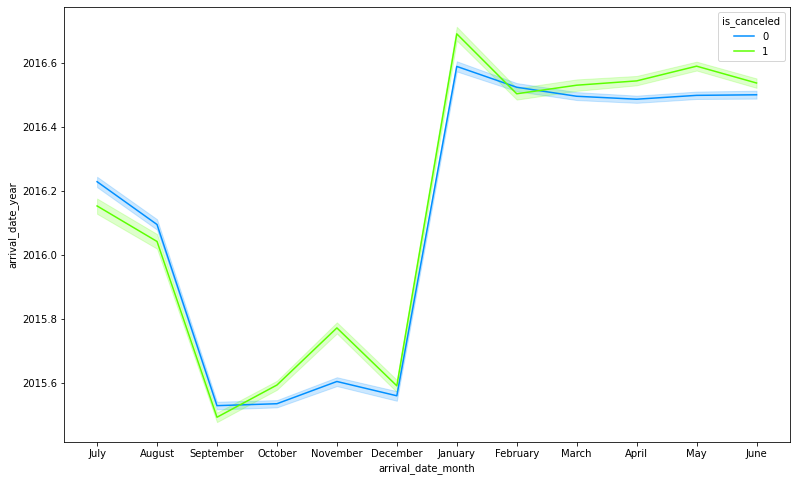

In [ ]:
plt.figure(figsize=(13,8))
sns.lineplot(x = 'arrival_date_month', y='arrival_date_year',data = df, hue = 'is_canceled', palette= 'gist_rainbow_r')

### Lets check season wise

In [ ]:
def season(x):
    if x in ['December','January','February']:
        return "Winter"
    if x in['March','April','May']:
        return "Spring"
    if x in['June','July', 'August']:
        return "Summer"
    if x in['September', 'October', 'November']:
        return "Autum"

In [ ]:
df['Seasons']=df['arrival_date_month'].apply(season)

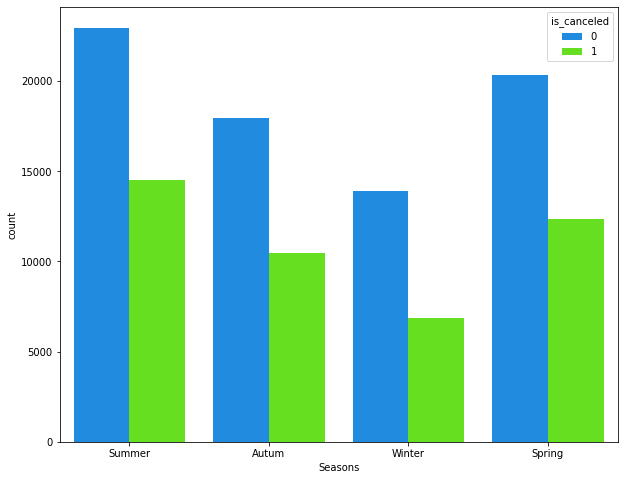

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Seasons', data = df, hue = 'is_canceled', palette= 'gist_rainbow_r')

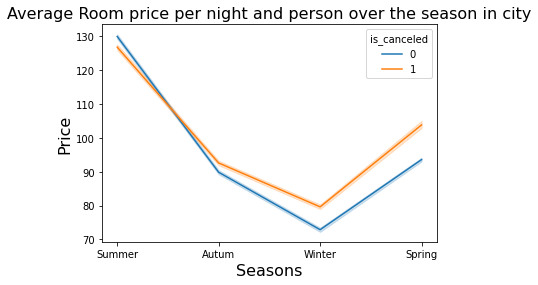

In [ ]:
sns.lineplot( x='Seasons' , y ='adr', data = df, hue = 'is_canceled')
plt.title("Average Room price per night and person over the season in city", fontsize=16)
plt.xlabel("Seasons", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

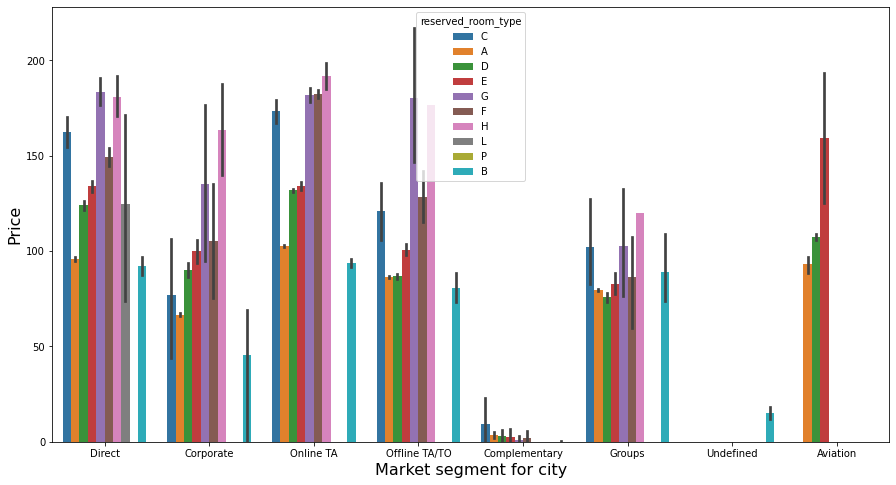

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data = df , x='market_segment' , y ='adr',hue="reserved_room_type")
plt.xlabel("Market segment for city", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

### Bookings per market segment

In [ ]:
# total bookings per market segment (incl. canceled)
segments=df["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

### Country wise traffic...

In [ ]:
# get number of acutal guests by country
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

**Country wise guests are coming**

In [ ]:
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"],
                    hover_name=country_data.index,
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()


In [ ]:
resort_hotel_df = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
city_hotel_df =df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [ ]:
resort_month=resort_hotel_df.groupby(["arrival_date_month"])["adr"].mean().reset_index()
city_month=city_hotel_df.groupby(["arrival_date_month"])["adr"].mean().reset_index()
resort_month

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


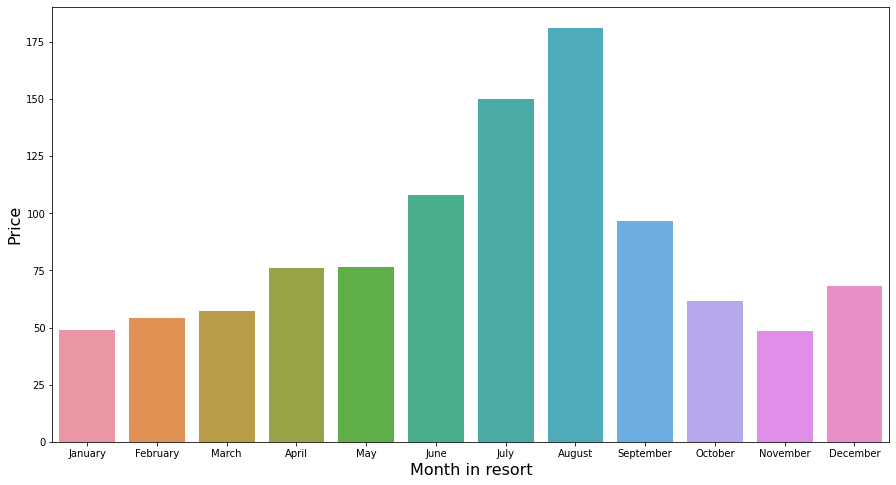

In [ ]:
plt.figure(figsize=(15,8))

ordered_months = ["January", "February", "March", "April", "May", "June",
"July", "August", "September", "October", "November", "December"]
resort_month.index = pd.CategoricalIndex(resort_month["arrival_date_month"],categories = ordered_months,ordered=True)
city_month.index = pd.CategoricalIndex(city_month["arrival_date_month"],categories = ordered_months,ordered=True)
resort_month = resort_month.sort_index()
city_month = city_month.sort_index()
sns.barplot(data = resort_month , x='arrival_date_month' , y ='adr')
plt.xlabel("Month in resort", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()


In [ ]:
df['arrival_date'] = df[["arrival_date_year","arrival_date_month","arrival_date_day_of_month"]].apply(lambda x: '/'.join(x.dropna().astype(str)),axis=1)

In [ ]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%Y/%B/%d', errors='coerce')

In [ ]:
df["Total_Guests"]=df["adults"]+df["children"]

In [ ]:
total_guests_index = df.loc[df['Total_Guests'] == 0].index
#Drop rows of total guests that have zero values
df.drop(total_guests_index, axis=0, inplace=True)

In [ ]:
df.isnull().mean() * 100

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.003355
babies                            0.000000
meal                              0.000000
country                           0.000000
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
days_in_wai

In [ ]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004862,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,0.054301,0.046492,-0.195701,-0.234877,0.049878
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037886,-0.021003,-0.123209,0.086025,-0.073599,0.002230,0.170008,-0.065018,-0.116624,-0.095949,0.074039
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054698,-0.013192,0.010281,-0.119905,0.029234,0.031416,-0.056348,0.198429,-0.013812,0.108610,0.055315
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005559,0.010417,-0.031125,0.035493,-0.021009,0.006311,0.022677,0.076281,0.001980,0.026202,0.024656
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014541,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.022532,0.030291,0.008569,0.003026,0.006773
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046134,0.018607,-0.086009,-0.012769,-0.042859,0.050191,-0.054399,0.050670,-0.018520,0.073124,0.102767
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044651,0.020373,-0.095302,-0.013976,-0.048873,0.080018,-0.002026,0.066847,-0.024933,0.068738,0.103105
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029416,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,-0.008365,0.224253,0.014438,0.123353,0.827211
children,0.004862,-0.037886,0.054698,0.005559,0.014541,0.046134,0.044651,0.029416,1.000000,0.023999,-0.032477,-0.024755,-0.021079,0.050997,-0.033294,0.325058,0.056245,0.081756,0.585981
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,-0.010627,0.029043,0.037389,0.097939,0.027995


### We **doesn't have highly corelated data**

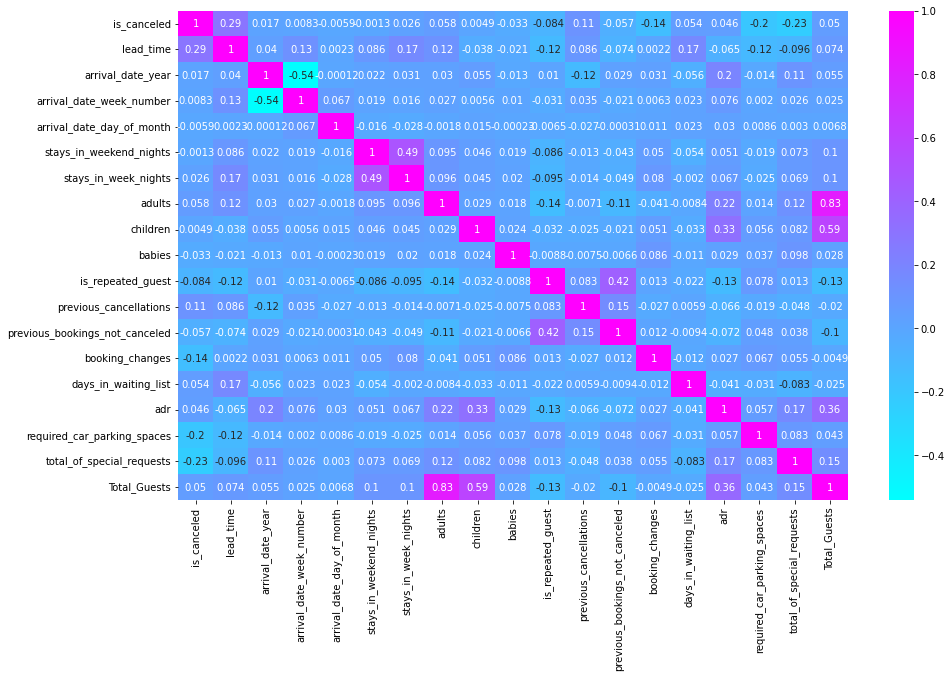

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True,cmap='cool')

In [ ]:
num_col = df.select_dtypes(exclude = ['object'])
cat_col = df.select_dtypes(include = ['object'])

In [ ]:
num_col.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'arrival_date', 'Total_Guests'],
      dtype='object')

In [ ]:
cat_col.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'Seasons'],
      dtype='object')

In [ ]:
df=df.drop(['children','Total_Guests','arrival_date'],axis=1)

In [ ]:
df['is_canceled'].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.reservation_status = le.fit_transform(df.reservation_status)

In [ ]:
df['reservation_status'].value_counts()

1    75011
0    42993
2     1206
Name: reservation_status, dtype: int64

In [ ]:
X = df.drop("is_canceled",axis=1)
y = df["is_canceled"]

In [ ]:
ct = make_column_transformer((
    StandardScaler(),['reservation_status', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']),(OneHotEncoder(handle_unknown="ignore"),['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type',
       'reservation_status_date', 'Seasons'])
)




In [ ]:
X.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Seasons'],
      dtype='object')

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
y_train.head()

32983    0
54151    1
76714    0
2274     1
15050    0
Name: is_canceled, dtype: int64

In [ ]:
X

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Seasons
0,Resort Hotel,342,2015,July,27,1,0,0,2,0,...,3,No Deposit,0,Transient,0.00,0,0,1,2015-07-01,Summer
1,Resort Hotel,737,2015,July,27,1,0,0,2,0,...,4,No Deposit,0,Transient,0.00,0,0,1,2015-07-01,Summer
2,Resort Hotel,7,2015,July,27,1,0,1,1,0,...,0,No Deposit,0,Transient,75.00,0,0,1,2015-07-02,Summer
3,Resort Hotel,13,2015,July,27,1,0,1,1,0,...,0,No Deposit,0,Transient,75.00,0,0,1,2015-07-02,Summer
4,Resort Hotel,14,2015,July,27,1,0,2,2,0,...,0,No Deposit,0,Transient,98.00,0,1,1,2015-07-03,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2017,August,35,30,2,5,2,0,...,0,No Deposit,0,Transient,96.14,0,0,1,2017-09-06,Summer
119386,City Hotel,102,2017,August,35,31,2,5,3,0,...,0,No Deposit,0,Transient,225.43,0,2,1,2017-09-07,Summer
119387,City Hotel,34,2017,August,35,31,2,5,2,0,...,0,No Deposit,0,Transient,157.71,0,4,1,2017-09-07,Summer
119388,City Hotel,109,2017,August,35,31,2,5,2,0,...,0,No Deposit,0,Transient,104.40,0,0,1,2017-09-07,Summer


### **As we don't know which model will work best. So let's apply Gridsearch to find out which is the best model for us**

#### For this we will create a dictionary with all the classification model with the hyperparameter

In [ ]:
model_param = {
    'LogisticRegression':{
        'model' : LogisticRegression(solver = 'liblinear',multi_class = 'auto'),
        'param' : {
            'penalty': ('l1', 'l2'),
            'C':[0.01, 0.1, 1, 10]
        }
    },
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy'],
            'max_depth': [3, 4, 5]
        }
    },
    'KNeighborsClassifier':{
        'model': KNeighborsClassifier(),
        'param':{
            'n_neighbors':[5,10,25]
        }
    },
    'SVC':{
        'model': SVC(),
        'param': {
            'kernel':['rbf', 'linear','poly','sigmoid'],
            'C':[1,5,10,20,50]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'param' : {
            'n_estimators': [1000,1200,1500]
        }
    }
}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=3,return_train_score=False)
    model_selection.fit(X_train_normal,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [ ]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

In [ ]:
model_xgb = XGBClassifier(colsample_bytree= 1.0,gamma= 1,max_depth= 5,min_child_weight= 5,subsample= 0.8)

In [ ]:
model_xgb.fit(X, y)

In [ ]:
print(classification_report(model_xgb.predict(X),Y))